# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-25, 42)
lng_range = (-139, 117)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_lat = []
city_lng = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_lat.append(lat_lng[0])
        city_lng.append(lat_lng[1])
# Print the city count to confirm sufficient count
len(cities)

610

In [3]:
#Create a dataframe w/ the City, Lat & Long, and adding columns for weather data, plus the extra data from the API call:
weather_df = pd.DataFrame({"City": cities, "Latitude": city_lat, "Longitude": city_lng})
weather_df["Temperature"] = ""
weather_df["Humidity"] = ""
weather_df["Cloudiness"] = ""
weather_df["Wind_speed"] = ""
weather_df["Record_Date"] = ""
weather_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_speed,Record_Date
0,taolanaro,-69.102646,64.252462,,,,,
1,tawkar,17.859433,37.861566,,,,,
2,punta arenas,-68.022792,-88.770356,,,,,
3,hermanus,-78.904867,-8.195522,,,,,
4,kahului,25.638263,-152.098066,,,,,


In [4]:
for index, row in weather_df.iterrows():
    url = "http://api.openweathermap.org/data/2.5/weather?"
    city = row["City"]
    units = "imperial"
    query_url = f"{url}appid={weather_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    weather_response = weather_response.json()
    #print(json.dumps(weather_response, indent=4, sort_keys=True))
    print(f"Processing Record {index} | {city}")
    # Since some data may be missing we incorporate a try-except to skip any that are missing a data point.
    try:
        weather_df.loc[index, "Temperature"] = weather_response["main"]["temp"]
        weather_df.loc[index, "Humidity"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Cloudiness"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Wind_speed"] = weather_response["wind"]["speed"]
        weather_df.loc[index, "Record_Date"] = weather_response["dt"]
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")


Processing Record 0 | taolanaro
Missing field/result... skipping.
Processing Record 1 | tawkar
Missing field/result... skipping.
Processing Record 2 | punta arenas
Processing Record 3 | hermanus
Processing Record 4 | kahului
Processing Record 5 | gamba
Processing Record 6 | baherden
Processing Record 7 | ushuaia
Processing Record 8 | tubruq
Missing field/result... skipping.
Processing Record 9 | norsup
Processing Record 10 | yatou
Processing Record 11 | kapaa
Processing Record 12 | castro
Processing Record 13 | vaini
Processing Record 14 | camocim
Processing Record 15 | tasiilaq
Processing Record 16 | yulara
Processing Record 17 | sungaipenuh
Processing Record 18 | kaitangata
Processing Record 19 | bluff
Processing Record 20 | diffa
Processing Record 21 | hithadhoo
Processing Record 22 | tuktoyaktuk
Processing Record 23 | saint-philippe
Processing Record 24 | alta floresta
Processing Record 25 | busselton
Processing Record 26 | belushya guba
Missing field/result... skipping.
Processing

Processing Record 227 | upata
Processing Record 228 | saskylakh
Processing Record 229 | cidreira
Processing Record 230 | brae
Processing Record 231 | chiang khong
Processing Record 232 | malwan
Missing field/result... skipping.
Processing Record 233 | tapaua
Missing field/result... skipping.
Processing Record 234 | attawapiskat
Missing field/result... skipping.
Processing Record 235 | broken hill
Processing Record 236 | norfolk
Processing Record 237 | turtkul
Missing field/result... skipping.
Processing Record 238 | bahia honda
Processing Record 239 | karatu
Processing Record 240 | hualmay
Processing Record 241 | carnarvon
Processing Record 242 | ranong
Processing Record 243 | kudahuvadhoo
Processing Record 244 | santa maria da vitoria
Processing Record 245 | salalah
Processing Record 246 | faanui
Processing Record 247 | katsuura
Processing Record 248 | yerbogachen
Processing Record 249 | namibe
Processing Record 250 | saldanha
Processing Record 251 | edirne
Processing Record 252 | vao

Processing Record 454 | puerto del rosario
Processing Record 455 | grand gaube
Processing Record 456 | huarmey
Processing Record 457 | rediu
Processing Record 458 | armacao dos buzios
Missing field/result... skipping.
Processing Record 459 | charlestown
Processing Record 460 | strelka
Processing Record 461 | karauzyak
Missing field/result... skipping.
Processing Record 462 | ximei
Processing Record 463 | praia
Processing Record 464 | gao
Processing Record 465 | mantua
Processing Record 466 | vredendal
Processing Record 467 | mezen
Processing Record 468 | champerico
Processing Record 469 | terrak
Processing Record 470 | te kauwhata
Processing Record 471 | lopare
Processing Record 472 | biak
Processing Record 473 | ust-ishim
Processing Record 474 | selma
Processing Record 475 | deori
Processing Record 476 | mangrol
Processing Record 477 | dunedin
Processing Record 478 | nelson bay
Processing Record 479 | srivardhan
Processing Record 480 | thap than
Processing Record 481 | isangel
Process

In [5]:
#Create a DF with ALL the info from the list of cities, then the API calls, and also replace empty spots with np.nan, to drop data with missing fields

weather_df["Temperature"].replace("", np.nan, inplace=True)
weather_df["Humidity"].replace("", np.nan, inplace=True)
weather_df["Cloudiness"].replace("", np.nan, inplace=True)
weather_df["Wind_speed"].replace("", np.nan, inplace=True)
weather_df["Record_Date"].replace("", np.nan, inplace=True)
weather_df.head(10)

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_speed,Record_Date
0,taolanaro,-69.102646,64.252462,NaN,NaN,NaN,NaN,NaN
1,tawkar,17.859433,37.861566,NaN,NaN,NaN,NaN,NaN
2,punta arenas,-68.022792,-88.770356,50.00,53.0,0.0,6.93,1.543370e+09
3,hermanus,-78.904867,-8.195522,51.79,90.0,92.0,3.83,1.543374e+09
4,kahului,25.638263,-152.098066,76.86,62.0,40.0,14.99,1.543374e+09
5,gamba,-9.033970,2.866903,11.47,39.0,0.0,2.04,1.543375e+09
6,baherden,40.534783,57.349195,33.02,82.0,0.0,2.15,1.543376e+09
7,ushuaia,-83.259660,-16.027649,48.20,57.0,20.0,17.22,1.543370e+09
8,tubruq,30.071799,23.436607,NaN,NaN,NaN,NaN,NaN
9,norsup,-16.835347,165.097238,85.94,80.0,68.0,3.94,1.543376e+09


In [6]:
#drop N/A values & do a count to make sure all rows have = amounts of data
weather_df.dropna(inplace=True)
weather_df.count()

City           548
Latitude       548
Longitude      548
Temperature    548
Humidity       548
Cloudiness     548
Wind_speed     548
Record_Date    548
dtype: int64

In [7]:
# Save data frame to CSV
weather_df.to_csv(output_data_file)

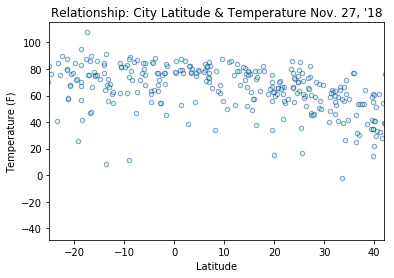

In [8]:
#Latitude & Temp Scatter Plot
latitude_temperature = weather_df.plot(kind="scatter", x="Latitude", y="Temperature", color="aquamarine", xlim=lat_range, alpha = 0.4, edgecolor = "darkblue", linewidths = 1)

plt.title("Relationship: City Latitude & Temperature Nov. 27, '18")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Latitude_Temperature.png")

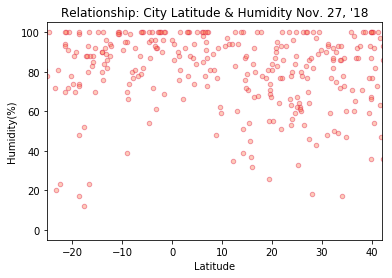

In [9]:
#Humidity (%) vs. Latitude Plot
latitude_humidity = weather_df.plot(kind="scatter", x="Latitude", y="Humidity", color="coral", xlim=lat_range, alpha = 0.4, edgecolor = "crimson", linewidths = 1)

plt.title("Relationship: City Latitude & Humidity Nov. 27, '18")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("Lat_Humidity.png")

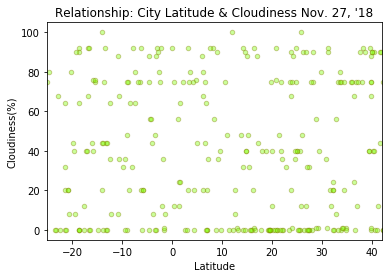

In [10]:
#Latitude vs. Cloudiness Plot
latitude_cloudiness = weather_df.plot(kind="scatter", x="Latitude", y="Cloudiness", color="chartreuse", xlim=lat_range, alpha = 0.4, edgecolor = "olive", linewidths = 1)

plt.title("Relationship: City Latitude & Cloudiness Nov. 27, '18")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("Latitude_Cloudiness.png")

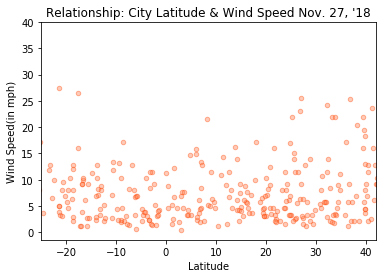

In [11]:
#Latitude vs. Windspead Plot
latitude_windspeed = weather_df.plot(kind="scatter", x="Latitude", y="Wind_speed", color="coral", xlim=lat_range, alpha = 0.4, edgecolor = "orangered", linewidths = 1)

plt.title("Relationship: City Latitude & Wind Speed Nov. 27, '18")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(in mph)")
plt.savefig("Latitude_WindSpeed.png")

In [ ]:
###Observations. 
##I changed the Lat/Long coordinates from the starter code, to include a rough box that includes 
##Japan to China, and West Australia to Auckland, NZ. There isn't a ton of land between,
##but with islands I figured this could be interesting.
##No real definite relationship between latitude and wind speed or cloudiness-- except for 
##a blip of cloudiness near the 20 degree lat. mark. 
##Higher humidity and temperatures appera to congregate around equator.